In [1]:
import os
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [2]:
os.path.realpath(os.path.curdir)

'C:\\Users\\ya391860\\Desktop\\Data Science\\titanic-survival-pred\\notebooks'

In [3]:
data_path=os.path.join(os.path.pardir,'data','raw')
train_path=os.path.join(data_path,'train.csv')
test_path=os.path.join(data_path,'test.csv')

In [4]:
# Load train data
df=pd.read_csv(train_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test=pd.read_csv(test_path)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test['Survived']=-999
df=pd.concat((df,df_test))

C:\Users\ya391860\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [8]:
a=df['Survived']
df.drop(columns=['Survived'],axis=1,inplace=True)
df['Survived']=a

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
Survived       1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [10]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Ticket', 'Survived'],
      dtype='object')

In [11]:
cat_cols=['PassengerId',  'Name','Cabin','Ticket', 'Pclass', 'Sex', 'SibSp', 'Parch',
         'Embarked', 'Survived']
num_cols=['Age', 'Fare']

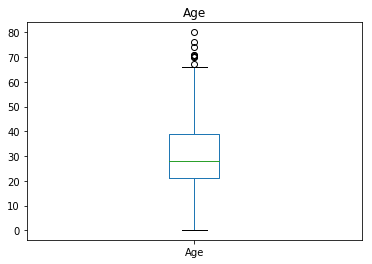

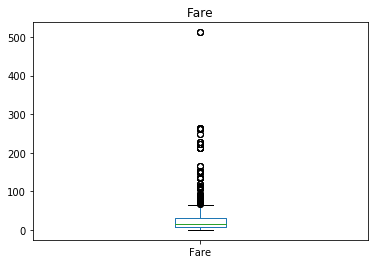

In [12]:
for i in num_cols:
    df[i].plot(kind='box')
    plt.title(i)
    plt.show()

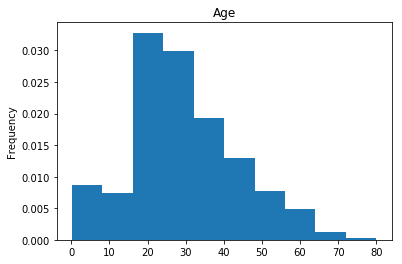

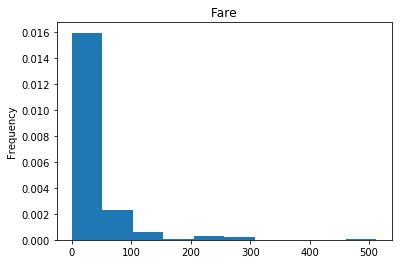

In [13]:
for i in num_cols:
    df[i].plot(kind='hist',density=True)
    plt.title(i)
    plt.show()

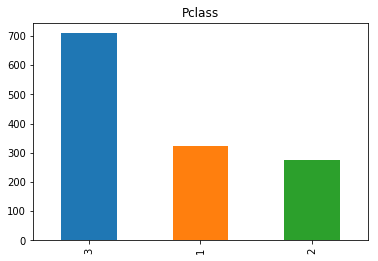

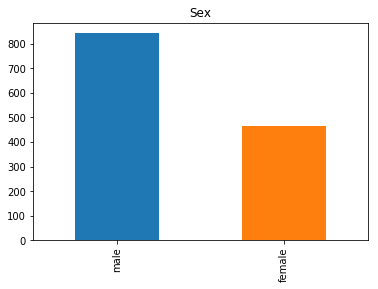

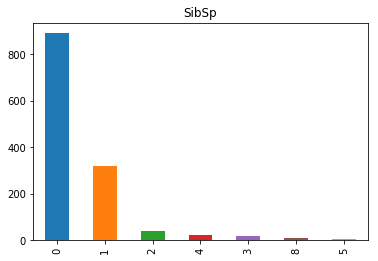

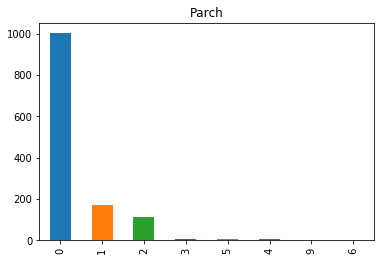

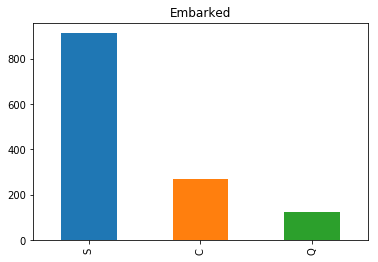

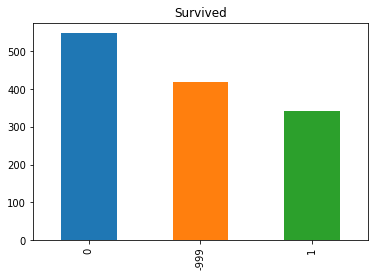

In [14]:
for i in cat_cols[4:]:
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

## Missing Value Imputation

In [15]:
def getTitle(name):
    title_dict={'mr':'Mr', 'mrs':'Mrs', 'miss':'Miss', 'master':'Master', 'ms':'Miss', 'col':'Officer', 'rev':'Sir', 'dr':'Officer', 'dona':'Lady',
       'don':'Sir', 'mme':'Lady', 'major':'Officer', 'lady':'Lady', 'sir':'Sir', 'mlle':'Lady', 'capt' :'Officer',
       'the countess':'Lady', 'jonkheer':'Sir'}
    get_name_with_title=name.split(',')[1]
    title=get_name_with_title.split('.')[0]
    return title_dict[title.strip().lower()]

df['Name'].map(lambda x: getTitle(x)).unique()

df['Title']=df['Name'].map(lambda x: getTitle(x))

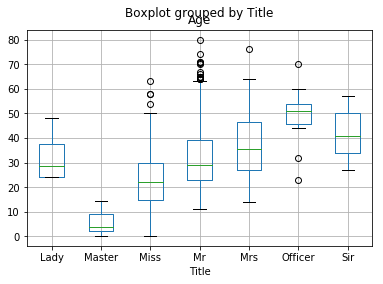

In [16]:
df[df.Age.notnull()].boxplot('Age','Title')

In [17]:
# Now we can fill Age using the title
df.Age.fillna(df.groupby('Title').Age.transform('median'),inplace=True)

In [18]:
df.loc[df.Fare.isnull(),'Fare']=df[(df.Embarked=='S')&(df.Pclass==3)&(df.Sex=='male')&(df.Age>60)].Fare.median()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
Survived       1309 non-null int64
Title          1309 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 143.2+ KB


In [20]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Survived,Title
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,113572,1,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,113572,1,Mrs


In [21]:
pd.crosstab(df.Embarked[df.Survived!=-999],df.Pclass[df.Survived!=-999])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [22]:
# As most 3rd class passengers board from S, we fill nas with 'S'
df.loc[df.Embarked.isnull(),'Embarked']='S'

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
Survived       1309 non-null int64
Title          1309 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 143.2+ KB


In [24]:
df.Fare.skew()

4.369147985211775

In [25]:
df[df.Fare==df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Survived,Title
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,PC 17755,1,Miss
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,PC 17755,1,Mr
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,PC 17755,1,Mr
343,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,PC 17755,-999,Mrs


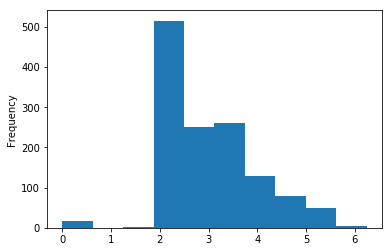

In [26]:
# As fare is highly skewed let's transform it using log Transformation to make the distribution look Normal
np.log(df.Fare+1).plot(kind='hist')

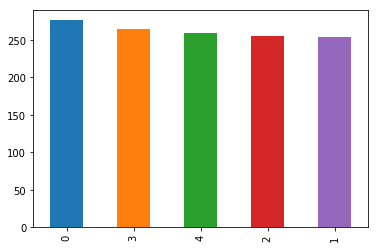

In [27]:
# Or we can discretize the data by using qcut
df['Fare_Class']=pd.qcut(df.Fare,5,labels=[0,1,2,3,4])
df.Fare_Class.value_counts().plot(kind='bar')

In [28]:
df['IsAdult']=np.where(df.Age<18,0,1)

In [29]:
# Survival of the Adults vs Children
pd.crosstab(df.loc[df.Survived!=-999,'IsAdult'],df.loc[df.Survived!=-999,'Survived'])

Survived,0,1
IsAdult,,
0,54,63
1,495,279


In [30]:
# creating a new feature 'IsMother' as mothers were given more priority over men
df['IsMother']=np.where((df.Age>18)&(df.Sex=='female')&(df.Title!='Miss')&(df.Parch>0),1,0)

In [31]:
# creating a family size feature
df['FamilySize']=df.Parch+df.SibSp+1

### We can see that children have greater than 50% probability of survival

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Ticket         1309 non-null object
Survived       1309 non-null int64
Title          1309 non-null object
Fare_Class     1309 non-null category
IsAdult        1309 non-null int32
IsMother       1309 non-null int32
FamilySize     1309 non-null int64
dtypes: category(1), float64(2), int32(2), int64(6), object(6)
memory usage: 165.1+ KB


## Removing Redundant Columns and Creating Dummy Variables

In [33]:
df.drop(['Cabin','Fare','Name','PassengerId','Ticket','SibSp','Parch'],axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age           1309 non-null float64
Embarked      1309 non-null object
Pclass        1309 non-null int64
Sex           1309 non-null object
Survived      1309 non-null int64
Title         1309 non-null object
Fare_Class    1309 non-null category
IsAdult       1309 non-null int32
IsMother      1309 non-null int32
FamilySize    1309 non-null int64
dtypes: category(1), float64(1), int32(2), int64(3), object(3)
memory usage: 93.5+ KB


In [35]:
df_processed=pd.get_dummies(df,columns=['Embarked','Sex','Title'])

In [36]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
Age              1309 non-null float64
Pclass           1309 non-null int64
Survived         1309 non-null int64
Fare_Class       1309 non-null category
IsAdult          1309 non-null int32
IsMother         1309 non-null int32
FamilySize       1309 non-null int64
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Sex_female       1309 non-null uint8
Sex_male         1309 non-null uint8
Title_Lady       1309 non-null uint8
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Sir        1309 non-null uint8
dtypes: category(1), float64(1), int32(2), int64(3), uint8(12)
memory usage: 78.2 KB


In [39]:
df_processed.Fare_Class=df_processed.Fare_Class.astype(np.int32)

In [40]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
Age              1309 non-null float64
Pclass           1309 non-null int64
Survived         1309 non-null int64
Fare_Class       1309 non-null int32
IsAdult          1309 non-null int32
IsMother         1309 non-null int32
FamilySize       1309 non-null int64
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Sex_female       1309 non-null uint8
Sex_male         1309 non-null uint8
Title_Lady       1309 non-null uint8
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Sir        1309 non-null uint8
dtypes: float64(1), int32(3), int64(3), uint8(12)
memory usage: 81.8 KB


In [41]:
proc_path=os.path.join(os.path.pardir,'data','processed','processed_data.csv')
df_processed.to_csv(proc_path)